## Bestimmung der Kommentarlänge

In [1]:
%matplotlib inline
import bz2
import json
import itertools as it
from pathlib import Path
import pandas as pd
import collections as co
import dask.bag as db
from toolz import map, pipe, compose, do, partition_all
import seaborn as sns
import matplotlib.pyplot as plt

### Lokaler Cluster

In [39]:
from dask.distributed import Client, progress

In [40]:
client = Client()

In [41]:
client

Client Scheduler: tcp://127.0.0.1:34159 Dashboard: http://127.0.0.1:45929,Cluster Workers: 8 Cores: 8 Memory: 4.96 GB


In [56]:
comments = Path("/media/jakob/bigdata/datasets/reddit/2016/RC_2016-*.bz2")
b = db.read_text(str(comments))
# b.take(100)
# df = b.to_dataframe()

In [7]:
b

dask.bag<bag-fro..., npartitions=12>

In [8]:
freq = b.map(json.loads).map(lambda x: len(x['body'])).frequencies()

In [9]:
future = client.compute(freq)

In [10]:
progress(future)

In [12]:
future

<Future: status: finished, type: list, key: finalize-c461055c22d7ff79078986b09bb2b721>

In [13]:
result = client.gather(future)

In [14]:
bodylength = pd.DataFrame(sorted(result), columns=['length', 'count'])

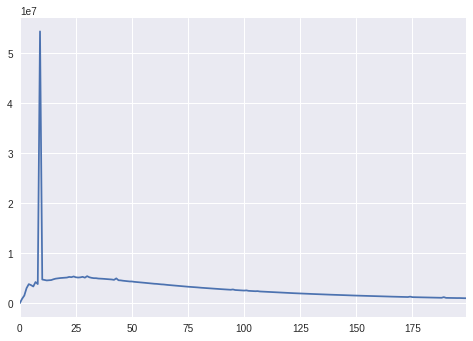

In [15]:
bodylength['count'][:200].plot()

In [104]:
len('[deleted]')

9

In [72]:
test = b.take(30)

In [73]:
testdb = db.from_sequence(test)

In [74]:
testdb.map(json.loads).pluck('body').filter(lambda x: len(x) == 9).frequencies().compute()

[('[removed]', 1)]

In [69]:
sum(bodylength['count']) - bodylength['count'][9] + (bodylength['count'][8] + bodylength['count'][10]) / 2

749817372.0

In [34]:
(bodylength['count'][8] + bodylength['count'][10]) / 2

4306913.0

In [75]:
jsons = testdb.map(json.loads)
non_removed = jsons.filter(lambda c: not (c in ['[deleted]', '[removed]']))
counted = non_removed.count()
counted.compute()

30

In [80]:
counted.visualize(filename='test_graph.svg');